## 数据预处理

In [1]:
from sklearn import datasets

In [2]:
import matplotlib.pyplot as plt

digits = datasets.load_digits()

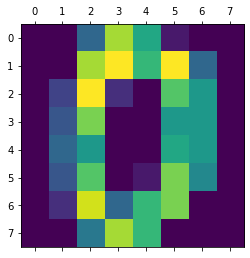

In [4]:
plt.matshow(digits.images[0])
plt.show()

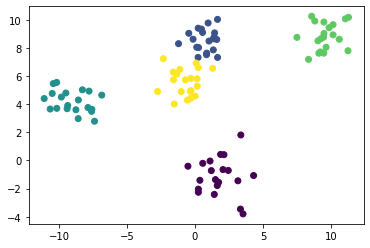

In [15]:
data, label = datasets.make_blobs(n_samples=100, n_features=2, centers=5)

plt.scatter(data[:, 0], data[:, 1], c=label)
plt.show()

In [16]:
from sklearn import preprocessing
data = [[0, 0], [1, 0], [-1, 1], [1, 2]]

[0.25 0.75]
[0.6875 0.6875]


In [18]:
# 最小最大值标准化
scalerstd = preprocessing.StandardScaler().fit(data)
print(scalerstd.mean_)
print(scalerstd.var_)
scalerstd.transform(data)

[0.25 0.75]
[0.6875 0.6875]


array([[-0.30151134, -0.90453403],
       [ 0.90453403, -0.90453403],
       [-1.50755672,  0.30151134],
       [ 0.90453403,  1.50755672]])

In [20]:
# 标准差标准化
scalermm = preprocessing.MinMaxScaler(feature_range=(0,1)).fit(data)
scalermm.transform(data)

array([[0.5, 0. ],
       [1. , 0. ],
       [0. , 0.5],
       [1. , 1. ]])

In [30]:
# L2正则变换，防止过拟合
X = [[ 1., -1.,  2.],
    [ 2.,  0.,  0.],
    [ 0.,  1., -1.]]
    
scalernorm = preprocessing.Normalizer(norm='l2').fit(X)
scalernorm.transform(X)

array([[ 0.40824829, -0.40824829,  0.81649658],
       [ 1.        ,  0.        ,  0.        ],
       [ 0.        ,  0.70710678, -0.70710678]])

In [31]:
# OneHotEncoder编码
data = [[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]]

scaleronehot = preprocessing.OneHotEncoder().fit(data)
scaleronehot.transform(data).toarray()

array([[1., 0., 1., 0., 0., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0.]])

In [33]:
# LabelEncoder编码
le = preprocessing.LabelEncoder().fit(["paris", "paris", "tokyo", "amsterdam"])
print(list(le.classes_))
le.transform(["tokyo", "tokyo", "paris"])

['amsterdam', 'paris', 'tokyo']


array([2, 2, 1])

In [32]:
import pandas as pd
df = pd.DataFrame({"key":['green','red', 'blue'],
            "data1":['a','b','c'],"sorce": [33,61,99]})

bins=[0,61,80,100]
cats=pd.cut(df["sorce"],bins)
print(cats)
group_name=["不及格","及格","优秀"]
cats2=pd.cut(df["sorce"],bins,labels=group_name,right=False)
print(cats2)
print(pd.get_dummies(cats2,prefix="sorce"))

0      (0, 61]
1      (0, 61]
2    (80, 100]
Name: sorce, dtype: category
Categories (3, interval[int64]): [(0, 61] < (61, 80] < (80, 100]]
0    不及格
1     及格
2     优秀
Name: sorce, dtype: category
Categories (3, object): [不及格 < 及格 < 优秀]
   sorce_不及格  sorce_及格  sorce_优秀
0          1         0         0
1          0         1         0
2          0         0         1


## 数据拆分

In [44]:
# train_test_split
from sklearn import model_selection
dataset = datasets.load_boston()
print(dataset.data.shape)
X_train, X_test, y_train, y_test = model_selection.train_test_split(dataset['data'], dataset['target'], 
                                                                    test_size=0.3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(506, 13)
(354, 13)
(354,)
(152, 13)
(152,)


In [50]:
# Kfold
import numpy as np
X = np.array(['a', 'b', 'c', 'd','e','f'])
kf = model_selection.KFold(n_splits=3)
k_list = kf.split(X)
for train,test in k_list:
    print(train,test)

print(X)

[2 3 4 5] [0 1]
[0 1 4 5] [2 3]
[0 1 2 3] [4 5]
['a' 'b' 'c' 'd' 'e' 'f']


## 模型使用

In [52]:
# LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True, normalize=False,copy_X=True, n_jobs=1)
model

LinearRegression(n_jobs=1)

In [53]:
X,y = datasets.load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

In [54]:
model.fit(X_train, y_train)

LinearRegression(n_jobs=1)

In [55]:
y_predict = model.predict(X_test)
mse = np.sum((y_predict-y_test)**2)/len(y_predict)
print(mse)

18.68457938196577


In [57]:
from sklearn.metrics import r2_score #R square
r2_score(y_test,y_predict)

0.7580218467738252